### 1. Апостериорное распределение для параметра распределения Пуассона.


Количество срабатываний счетчика Гейгера за минуту $n$ подчиняется распределению Пуассона:
$$
P_\lambda(n)=\frac{\lambda^n}{n !} e^{-\lambda} \text {. }
$$
1. В ходе эксперимента счетчик Гейгера сработал за минуту $m$ раз. С помощью теоремы Байеса определите апостериорное распределение на $\lambda$. Указание: априорную плотность вероятности $\lambda$ можно считать постоянной (так как мы изначально ничего не знаем про $\lambda$ ) .
2. Эксперимент повторили еще раз, в этот раз счетчик Гейгера сработал за минуту $m^{\prime}$ раз. Как обновилось апостериорное распределение на $\lambda$ ?

**Примечание.**

Такая плотность вероятности не будет нормируема. Чтобы сделать рассуждение более строгим, можно ввести обрезку на очень больших $\lambda$ (так как это нереалистичные значения). Другими словами, можно считать, что априорная плотность вероятности $p_0(\lambda)-$ это какая-то очень медленно меняющаяся функция и как-то убывающая на бесконечности. Тогда в числителе и знаменателе формулы Байеса она будет домножаться на гораздо более быструю функцию и поэтому можно заменить $p_0(\lambda) \rightarrow p_0(0)$. Константа $p_0(0)$ должна сократиться в ходе вычислений.

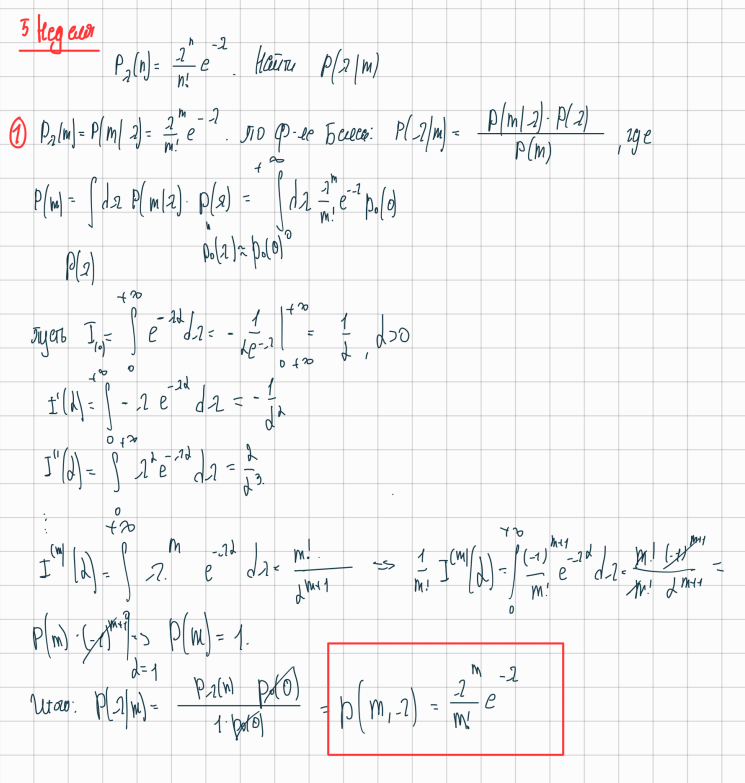

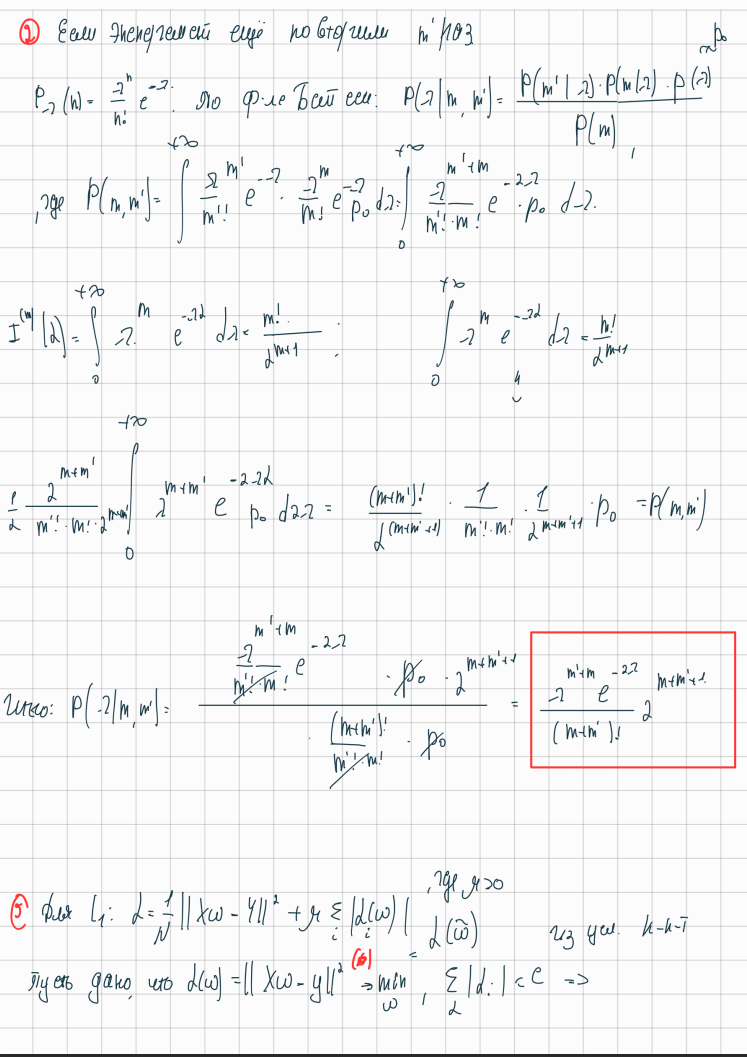

### 3. L1-регуляризация.

Для стандартного набора данных для задачи регрессии (см. например load_diabetes из sklearn.datasets) продемонстрируйте, как веса обращаются в ноль по мере увеличения коэффициента $\mu$ $L_1$-регуляризации. Разрешается использовать библиотечную реализацию регрессии, как в примере ниже:

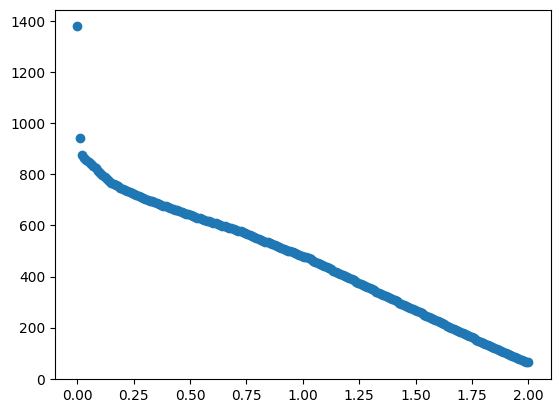

In [16]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import Lasso
import numpy as np
import matplotlib.pyplot as plt


data, target = load_diabetes(return_X_y=True)
a = 1e-6
alpha_linspace = np.linspace(a, 2, 200)
y = []
for i in alpha_linspace:
    lm = Lasso(i)
    lm.fit(data, target)
    values = lm.coef_
    y.append(np.sqrt(np.sum(values**2)))

plt.scatter(alpha_linspace, y)
plt.show()

### 4. K-fold кроссвалидация и L1-регуляризация градиентным спуском.

На семинаре обсуждалось решение задачи регрессии с $L 1$-регуляризацией с помощью метода градиентного спуска. C помощью K-Fold кроссвалидаций $(K=3)$ осуществите для этого метода подбор параметров: коэффициент перед регуляризатором и параметр градиентного спуска (learning rate). В качестве данных возьмите значения какой-нибудь неполиномиальной функции на равномерной или случайной сетке (на выбор семинариста) с добавленным гауссовым шумом. Насколько стабильно по отношению к запуску работает градиентный спуск?

Указание.
Можно взять функцию градиентного спуска из семинара или встроенную реализацию.  Например, можете использовать этот код

In [18]:
# Реализация градиентного спуска
# Ищем минимум следующей функции

def f(x1, x2):
    return 0.5*x1**2 + (5/2)*x2**2 - x1*x2 - 2*(x1 + x2)

def gradient(x1, x2):
    return np.array([-2 + x1 - x2, -2 - x1 + 5*x2])

def norm(matrice_1x2):
    n_line = matrice_1x2.shape[0]
    N = 0
    for i in range(n_line):
        N += matrice_1x2[i]**2
    return np.sqrt(N)

x1, x2 = -25, -35
alpha = 0.1
epsilon = pow(10,-6)

grad_f = gradient(x1, x2)
n_grad = norm(grad_f)

i = 1
evolution_X1_X2 = [[x1, x2]]
while n_grad > epsilon:

    direction = -grad_f
    x1, x2 = x1 + alpha*direction[0], x2 + alpha*direction[1]
    evolution_X1_X2 = np.vstack((evolution_X1_X2, [x1, x2]))
    grad_f = gradient(x1, x2)
    n_grad = norm(grad_f)
    i += 1

evolution_X1 = evolution_X1_X2[:, 0]
evolution_X2 = evolution_X1_X2[:, 1]


x1 = np.linspace(-30, 25, 150)
x2 = np.linspace(-40, 20, 150)
X1, X2 = np.meshgrid(x1, x2)
Z = f(X1, X2)

fig = plt.figure(figsize = (10,7))
plt.grid(False)
plt.imshow(Z, extent = [-30,25,-40,20], origin = 'lower', cmap = 'jet', alpha = 1)
plt.title("Evolution of the cost function during gradient descent with level circles", fontsize=15)
plt.plot(evolution_X1, evolution_X2)
plt.plot(evolution_X1, evolution_X2, '*', label = "Cost function")
plt.xlabel('x1', fontsize=11)
plt.ylabel('x2', fontsize=11)
plt.colorbar()
plt.legend(loc = "upper right")
plt.show()    

### 5. Лассо Тибширани: связь L1 и L2 между собой.


Покажите, что задача минимизации квадратичной функции потерь с дополнительным ограничением (лассо Тибширани):
$$
\mathcal{L}=\|X w-y\|^2 \rightarrow \min _w, \quad \sum_\alpha\left|w_\alpha\right|<C
$$
эквивалентна L1-регуляризации. Указание: можно воспользоваться условиями Каруша - Куна — Таккера (обобщение метода Лагранжа).

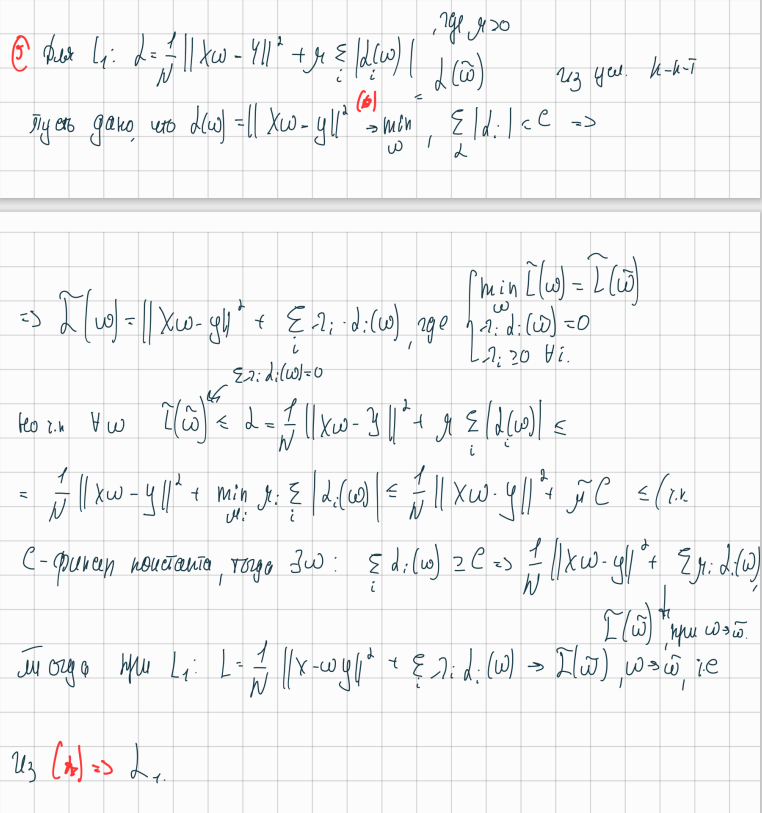